Prima parte

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading data
csv_x1 = r"pressure_8734.csv"
csv_x2 = r"pressure_8606.csv"

df1 = pd.read_csv(csv_x1)
df2 = pd.read_csv(csv_x2)

# segnali di pressione
x1 = df1["pressure_value"].values
x2 = df2["pressure_value"].values

#asse delle ascisse definito dalle ore a cui vengono lette le pressioni
ore = df1['hour'].str.split(':').str[0].astype(int).values


In [3]:
#definizione funzioni utili
def rect(n):
    return np.where(np.abs(n) <= 0.5, 1, 0)

def tri(n):
    return np.where(np.abs(n) <= 1, 1 - np.abs(n), 0)

def valore_medio(sig):
    return np.mean(sig)

def energia(sig):
    return np.sum(np.dot(sig, sig))

def sinc_filter(n):
    return np.sin(n)/(n)

def convoluzione(sig1, sig2):
    ris = np.zeros(len(sig1))
    for i in range(len(sig1)-1):
        ris[i] = sig1[i] * sig2[-i-1] / len(sig1)
    return ris



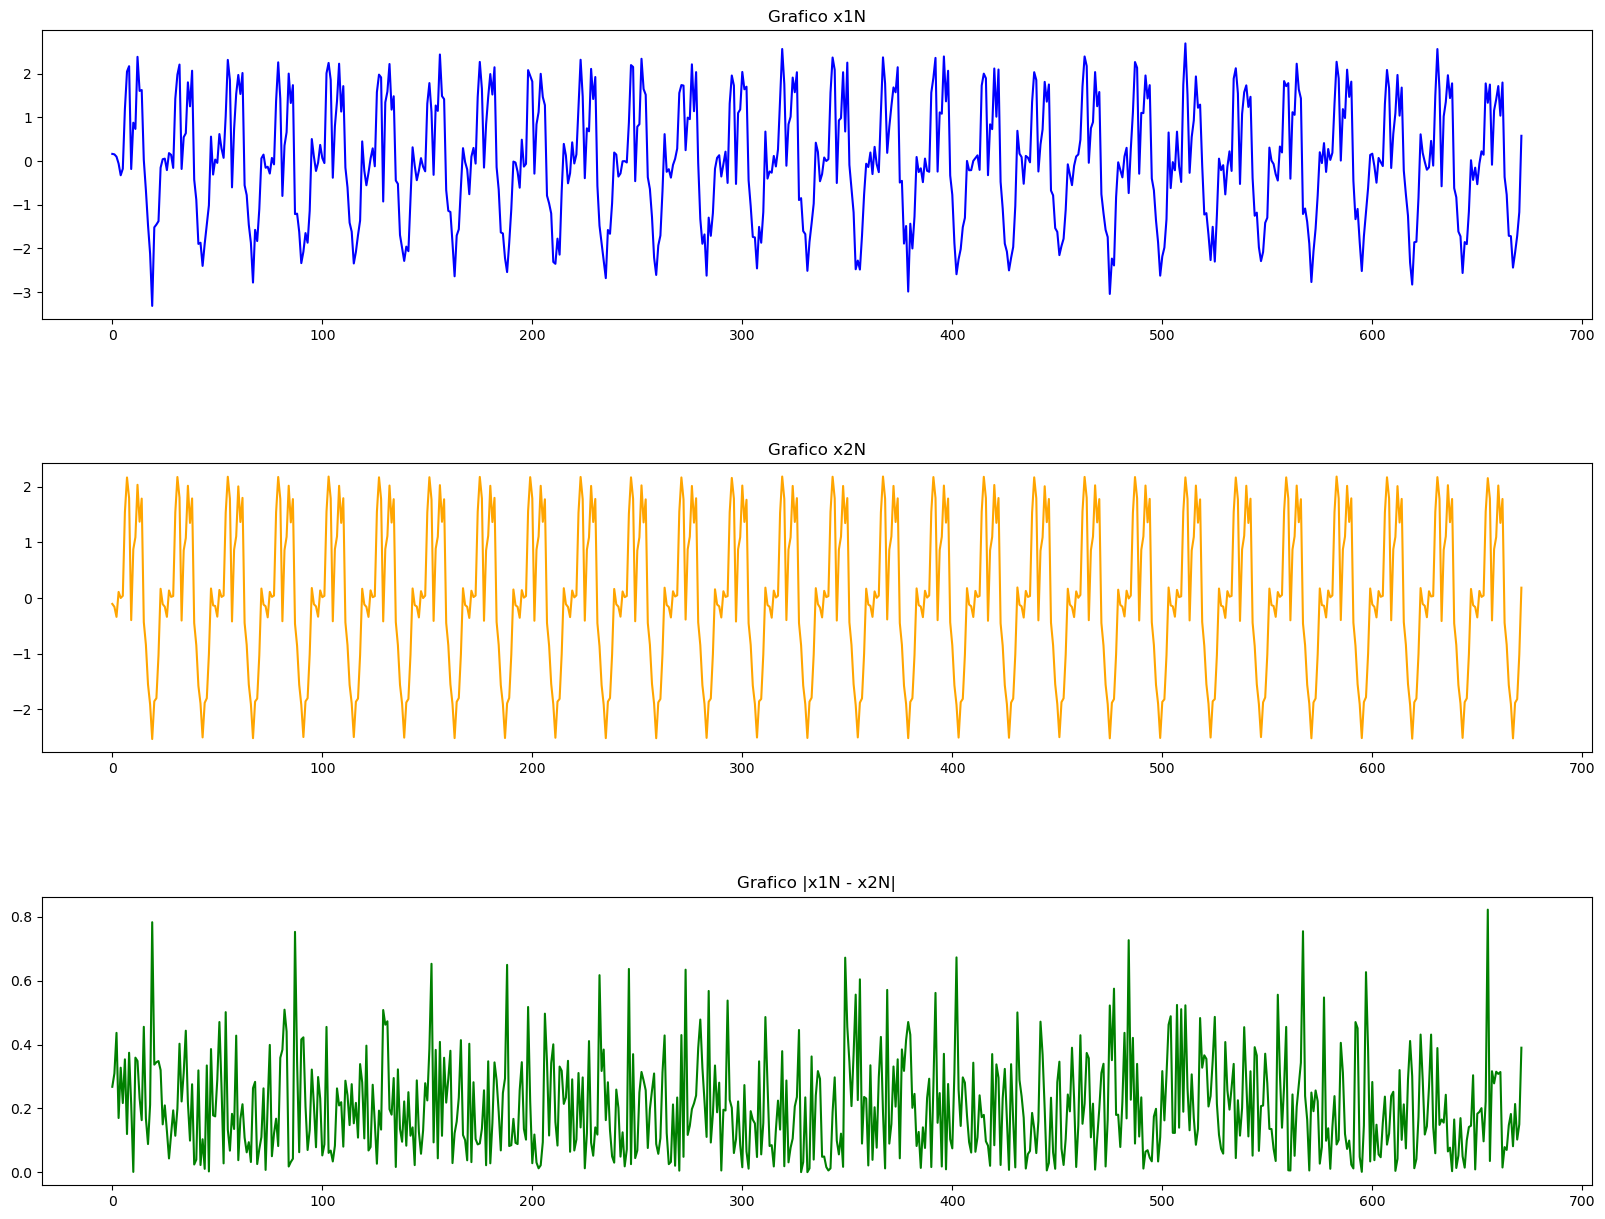

In [36]:
# --- ESERCIZIO 2.1 ---
# DEFINIZIONE DELLE VARIABILI
x1N = x1 - valore_medio(x1)
x2N = x2 - valore_medio(x2)
diff = np.abs(x1N - x2N)

# GRAFICI
fig, (ax1 , ax2 , ax3) = plt.subplots(3 , 1 ,figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

ax1.plot(ore, x1N , label='funzione 1', color='blue')
ax1.set_title("Grafico x1N")


ax2.plot(ore , x2N, label='funzione 2', color='orange')
ax2.set_title("Grafico x2N")

ax3.plot(ore, diff , color="green")
ax3.set_title("Grafico |x1N - x2N|")

plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_25264\1615221274.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_corr = int(np.correlate(x1, x1))
C:\Users\Utente\AppData\Local\Temp\ipykernel_25264\1615221274.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_corr = int(np.correlate(y_n, y_n))
C:\Users\Utente\AppData\Local\Temp\ipykernel_25264\1615221274.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_corr = int(np.correlate(x1, x1))
C:\Users\Utente\A

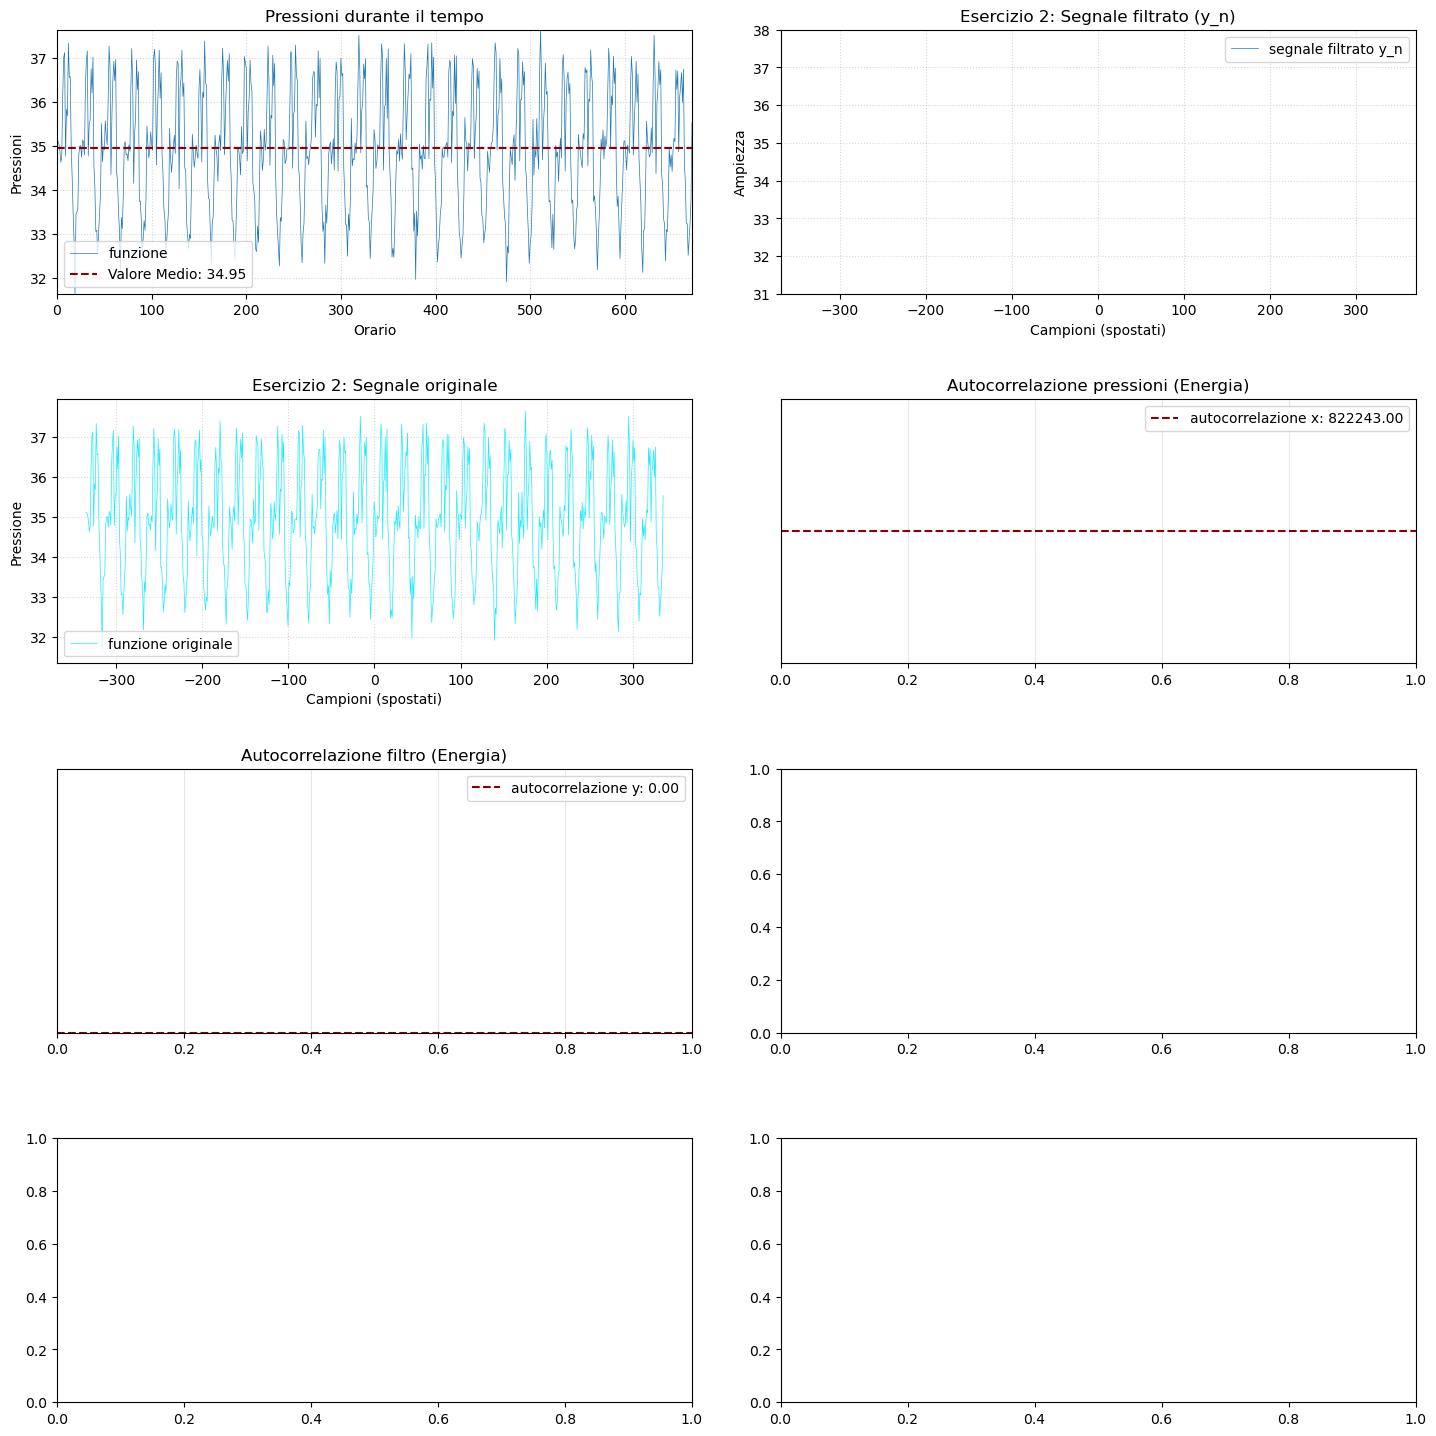

[]

In [7]:
# --- GRAFICO LETTURA PRESSIONI ---
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

# Grafico 1
axs[0, 0].plot(ore, x1, label='funzione', color='#1f77b4', linewidth=0.5)
axs[0, 0].axhline(valore_medio(x1), linestyle='--', color='darkred', label=f'Valore Medio: {valore_medio(x1):.2f}')
#axs[0, 0].axhline(energia(x1), linestyle='--', color='darkred', label=f'Energia: {energia(x1):.2f}')
axs[0, 0].set_xlim(min(ore), max(ore))
axs[0, 0].set_ylim(min(x1), max(x1))
axs[0, 0].set_xlabel("Orario")
axs[0, 0].set_ylabel("Pressioni")
axs[0, 0].set_title("Pressioni durante il tempo")
axs[0, 0].grid(True, linestyle=':', alpha=0.5)
axs[0, 0].legend()

# Esercizio 2
x_spostato = np.subtract(ore, (len(ore)-1)/2)
h_x = np.sinc(x_spostato)

y_n = np.convolve(h_x, x1, mode="same")
y_n = convoluzione(h_x, x1)

#grafico convoluzione x1 e sinc
"""plt.subplot(2,3,3)
plt.plot(rect(1), y_n, label='convoluzione', color="#ff0606", linewidth=0.5)
plt.show()"""

axs[0, 1].plot(x_spostato, y_n, label='segnale filtrato y_n', color='#1f77b4', linewidth=0.5)
axs[0, 1].set_ylim(31,38)
axs[0, 1].set_title("Esercizio 2: Segnale filtrato (y_n)")
axs[0, 1].set_xlabel("Campioni (spostati)")
axs[0, 1].set_ylabel("Ampiezza")
axs[0, 1].grid(True, linestyle=':', alpha=0.5)
axs[0, 1].legend()

#es2: Grafico Pressioni 
axs[1, 0].plot(x_spostato, x1, label='funzione originale', color="#1AECFF", linewidth=0.5)
axs[1, 0].set_title("Esercizio 2: Segnale originale")
axs[1, 0].set_xlabel("Campioni (spostati)")
axs[1, 0].set_ylabel("Pressione")
axs[1, 0].grid(True, linestyle=':', alpha=0.5)
axs[1, 0].legend()

#Esercizio 2 punto b
#autocorrelazione segnali x e y
x_corr = int(np.correlate(x1, x1))
y_corr = int(np.correlate(y_n, y_n))

#autocorrelazione segnali x e y
x_corr = int(np.correlate(x1, x1))
y_corr = int(np.correlate(y_n, y_n))

#es2b: Autocorrelazione X
axs[1, 1].axhline(x_corr, linestyle='--', color='darkred', label=f'autocorrelazione x: {x_corr:.2f}')
axs[1, 1].set_title("Autocorrelazione pressioni (Energia)")
axs[1, 1].grid(True, alpha=0.3)
axs[1, 1].legend()
axs[1, 1].set_yticks([]) 


#es2b: Autocorrelazione Y
axs[2, 0].axhline(y_corr, linestyle='--', color='darkred', label=f'autocorrelazione y: {y_corr:.2f}')
axs[2, 0].set_title("Autocorrelazione filtro (Energia)")
axs[2, 0].grid(True, alpha=0.3)
axs[2, 0].legend()
axs[2, 0].set_yticks([])


#axs[2, 1].axis('off')

# Spaziatura e visualizzazione
plt.tight_layout(pad = 3.0)
plt.show()

# Esercizio 3.1
axs[3, 0].axhline(y_corr, linestyle='--', color='darkred', label=f'autocorrelazione y: {y_corr:.2f}')
axs[3, 0].set_title("Autocorrelazione filtro (Energia)")
axs[3, 0].grid(True, alpha=0.3)
axs[3, 0].legend()
axs[3, 0].set_yticks([])

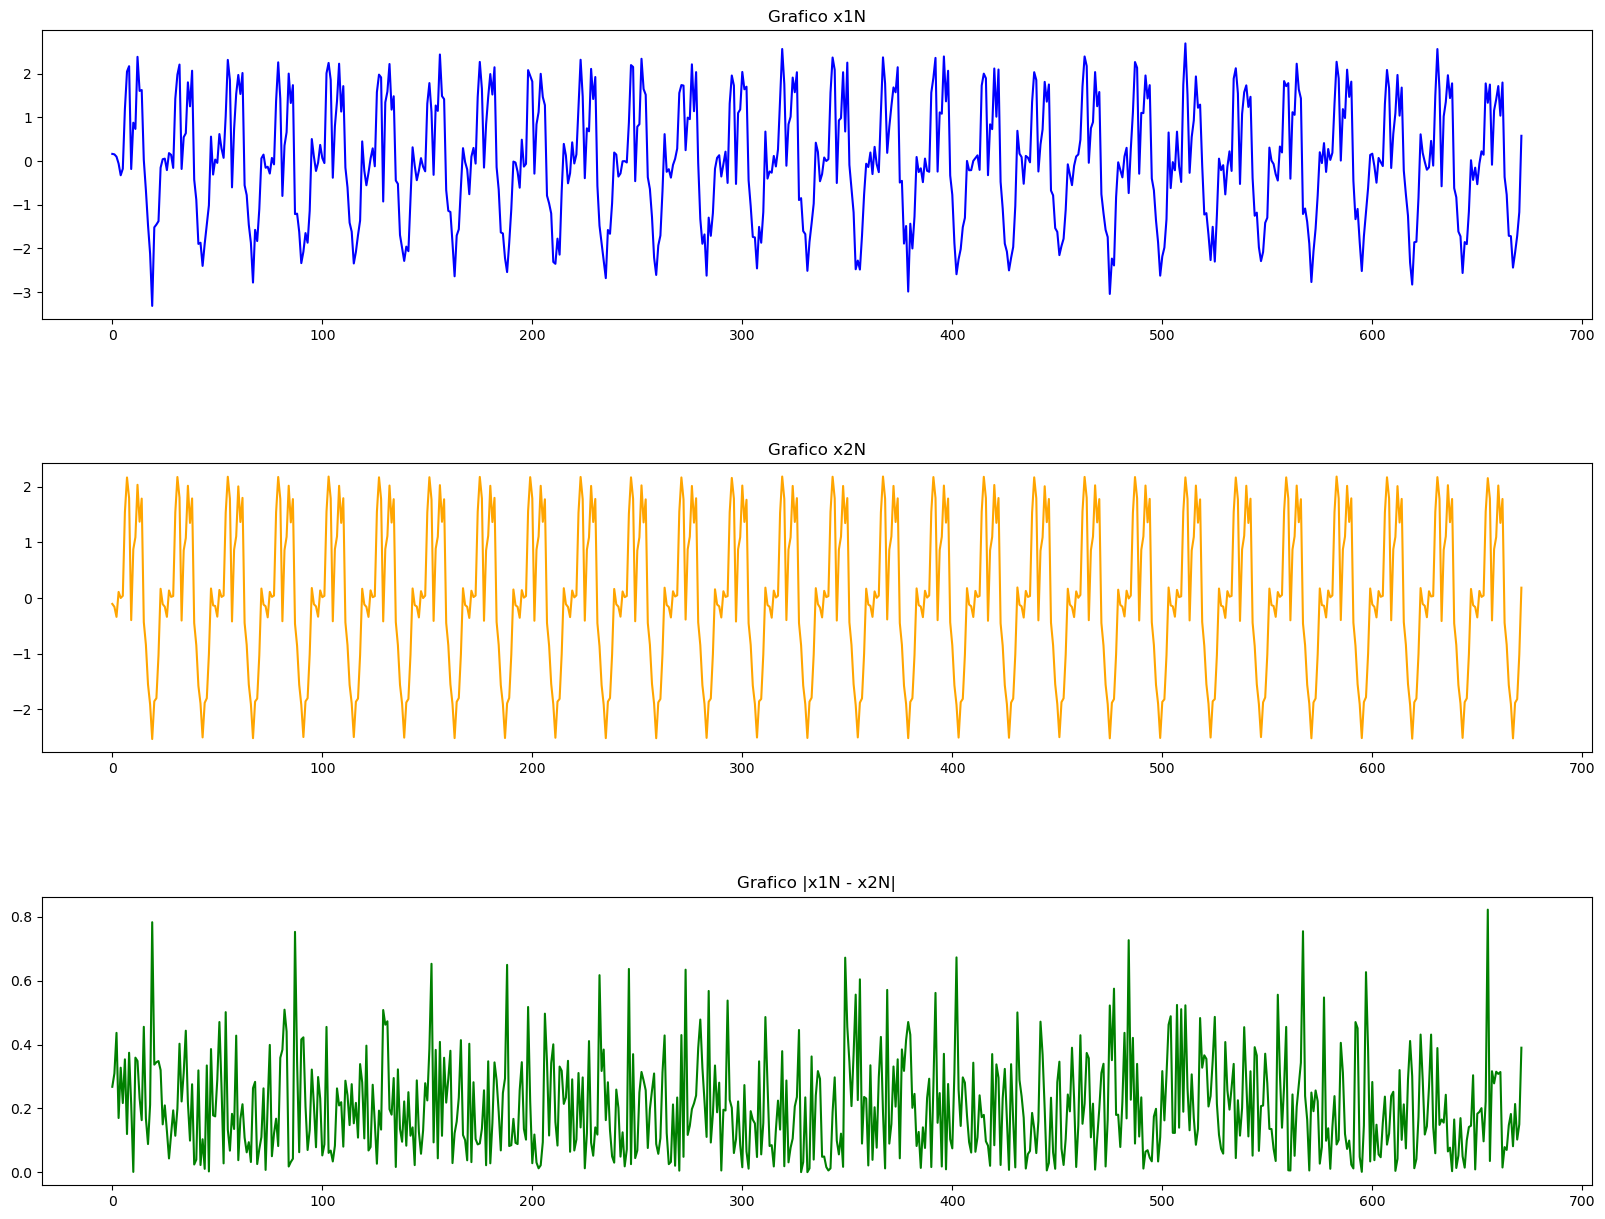

In [35]:
# --- ESERCIZIO 3.1 ---

# DEFINIZIONE DELLE VARIABILI
x1N = x1 - valore_medio(x1)
x2N = x2 - valore_medio(x2)
diff = np.abs(x1N - x2N)

# GRAFICI
fig, (ax1 , ax2 , ax3) = plt.subplots(3 , 1 ,figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

ax1.plot(ore, x1N , label='funzione 1', color='blue')
ax1.set_title("Grafico x1N")


ax2.plot(ore , x2N, label='funzione 2', color='orange')
ax2.set_title("Grafico x2N")

ax3.plot(ore, diff , color="green")
ax3.set_title("Grafico |x1N - x2N|")

plt.show()